In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [129]:
fold = '*'
path = 'C:/Users/minsu/Desktop/Work/current/mlpractical/semester2/TwitterSA/code/reports/*-fold{}.csv'.format(fold)
def read_reports(path, layers, max_length):
    dfs = []
    kernel_sizes = []
    accuracy_values = []
    all_files = glob.glob(path)
    for filename in all_files:
        if layers in filename and max_length in filename:
            dfs.append(pd.read_csv(filename))
            kernel_substring_location = filename.find('kernel')
            kernel_number = filename[kernel_substring_location - 2:kernel_substring_location]
            if not kernel_number.isnumeric:
                kernel_number = kernel_number[1:len(kernel_number)]
            ksize = int(kernel_number)
            kernel_sizes.append(ksize)
    for k in range(len(kernel_sizes)):
        if kernel_sizes[k] < 0:
            kernel_sizes[k] = -kernel_sizes[k]
        accuracy_values.append(dfs[k].loc[3][1])
    sorted_data = sorted(zip(kernel_sizes, accuracy_values), key=lambda x: x[0])
    kernel_sizes, accuracy_values = zip(*sorted_data)
    return kernel_sizes, accuracy_values

In [130]:
def cal_average(kernel_sizes, accuracy_values):
    new_kernel_sizes = [kernel_sizes[0]]
    new_accuracy_values = [accuracy_values[0]]
    current_kernel = kernel_sizes[0]
    current_idx = 0
    current_kernel_count = 1
    for i in range(1, len(kernel_sizes)):
        next_kernel = kernel_sizes[i]
        if next_kernel != current_kernel:
            current_kernel = next_kernel
            current_kernel_count = 1
            current_idx += 1
            new_kernel_sizes.append(next_kernel)
            new_accuracy_values.append(accuracy_values[i])
        else:
            past_acc_sum = new_accuracy_values[current_idx] * current_kernel_count
            current_kernel_count += 1
            new_accuracy_values[current_idx] = (past_acc_sum + accuracy_values[i]) / current_kernel_count
    print(len(new_kernel_sizes), len(new_accuracy_values))
    print(new_kernel_sizes, new_accuracy_values)
    return new_kernel_sizes, new_accuracy_values

In [125]:
layers0 = '4cnn'
max_length0 = '40mlength'

kernel_sizes0, accuracy_values0 = read_reports(path, layers0, max_length0)
kernel_sizes0, accuracy_values0 = cal_average(kernel_sizes0, accuracy_values0)

9 9
[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.9654088050314464, 0.9676616915422884, 0.9663475077442972, 0.963108983384962, 0.9639538158265276, 0.9617009293156856, 0.9604806157889796, 0.9128403088175538, 0.9022754977651362]


In [126]:
layers1 = '3cnn'

kernel_sizes1, accuracy_values1 = read_reports(path, layers1, max_length0)
kernel_sizes1, accuracy_values1 = cal_average(kernel_sizes1, accuracy_values1)

9 9
[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.9672862104571482, 0.96658218342251, 0.9689758753402796, 0.9652679996245188, 0.9625457617572516, 0.9656434807096592, 0.9612315779592604, 0.9638130104196, 0.9623110860790388]


In [127]:
layers2 = '2cnn'

kernel_sizes2, accuracy_values2 = read_reports(path, layers2, max_length0)
kernel_sizes2, accuracy_values2 = cal_average(kernel_sizes2, accuracy_values2)

9 9
[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.9663475077442972, 0.9685534591194968, 0.9665352482868677, 0.9646109077255234, 0.9591664319909884, 0.9640946212334554, 0.9634844644701024, 0.9638130104196, 0.9630620482493194]


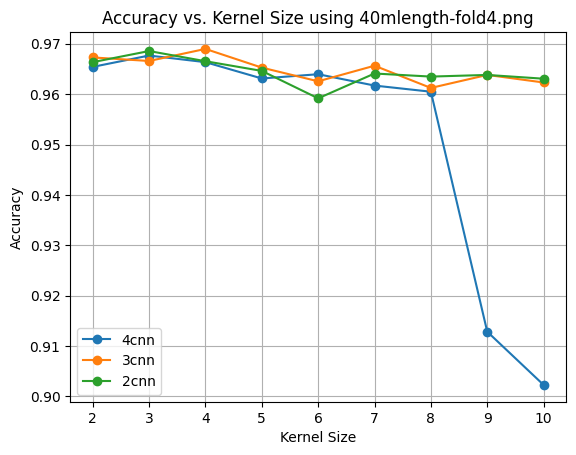

In [128]:
plt.plot(kernel_sizes0, accuracy_values0, '-o', label=layers0)
plt.plot(kernel_sizes1, accuracy_values1, '-o', label=layers1)
plt.plot(kernel_sizes2, accuracy_values2, '-o', label=layers2)
plt.xlabel('Kernel Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Kernel Size using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.grid(True)
plt.legend()
plt.savefig('./reports/figures/Accuracy vs. Kernel Size using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.show()